# **💳 Credit Card Clustering | KMeans, DBSCAN, GMM & PCA**

In [2]:
%%HTML
<style>
    body {
        --vscode-font-family: "KoddiUD 온고딕"
    }
</style>

In [3]:
# 라이브러리 불러오기
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats


# 한글 폰트 설정
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# **0. 데이터 준비하기**
- 데이터 출처: [Kaggle](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data) `Credit Card Dataset`

- 데이터 명세

| No. | 표준항목명             | 영문명                     | 설명                                                                           | 표현형식/단위  | 예시          |
|-----|------------------|---------------------|-----------------------------------------------------------------------------|-------------|-------------|
| 1   | 고객 ID             | CUST_ID               | 고객을 식별하기 위한 고유 ID                                                           | -           | C10001      |
| 2   | 잔액                | BALANCE               | 신용카드 계좌의 현재 잔액                                                               | N           | 40.9        |
| 3   | 잔액 업데이트 빈도     | BALANCE_FREQUENCY     | 잔액이 업데이트 되는 빈도                                                             | N           | 0.818       |
| 4   | 총 구매액            | PURCHASES             | 신용카드로 이루어진 총 구매액                                                          | N           | 95.4        |
| 5   | 일회성 구매액         | ONEOFF_PURCHASES      | 일회성으로 이루어진 구매액                                                             | N           | 0.0         |
| 6   | 할부 구매액           | INSTALLMENTS_PURCHASES | 할부로 이루어진 구매액                                                               | N           | 95.4        |
| 7   | 현금 서비스 금액       | CASH_ADVANCE          | 현금 서비스로 인출한 금액                                                              | N           | 0.0         |
| 8   | 구매 빈도             | PURCHASES_FREQUENCY    | 구매가 이루어진 빈도                                                                 | N           | 0.167       |
| 9   | 일회성 구매 빈도       | ONEOFF_PURCHASES_FREQUENCY | 일회성 구매가 이루어진 빈도                                                           | N           | 0.0         |
| 10  | 할부 구매 빈도         | PURCHASES_INSTALLMENTS_FREQUENCY | 할부 구매가 이루어진 빈도                                                         | N           | 0.083       |
| 11  | 현금 서비스 빈도       | CASH_ADVANCE_FREQUENCY  | 현금 서비스가 이루어진 빈도                                                           | N           | 0.0         |
| 12  | 현금 서비스 거래 횟수   | CASH_ADVANCE_TRX       | 현금 서비스 거래의 횟수                                                             | N           | 0           |
| 13  | 구매 횟수             | PURCHASES_TRX         | 총 구매 거래의 횟수                                                                | N           | 2           |
| 14  | 신용 한도             | CREDIT_LIMIT          | 신용카드의 신용 한도                                                                | N           | 1000.0      |
| 15  | 지불액               | PAYMENTS              | 신용카드 계좌에 지불한 총 금액                                                        | N           | 201.8       |
| 16  | 최소 지불액           | MINIMUM_PAYMENTS      | 신용카드 계좌의 최소 지불액                                                           | N           | 139.5       |
| 17  | 전액 지불 비율        | PRC_FULL_PAYMENT      | 신용카드 결제 금액 중 전액을 지불한 비율                                                  | N           | 0.0         |
| 18  | 카드 소지 기간         | TENURE                | 신용카드 계좌를 소지한 기간 (월)                                                       | N           | 12          |



- 데이터 분류

  - 고객 정보
  
    - CUST_ID: 고객 식별자
    - TENURE: 고객의 카드 보유 기간
  
  - 잔액/결제 관련
  
    - BALANCE: 잔액
    - BALANCE_FREQUENCY: 잔액 사용 빈도
    - CREDIT_LIMIT: 신용한도
    - PAYMENTS: 결제액
    - MINIMUM_PAYMENTS: 최소 결제액
    - PRC_FULL_PAYMENT: 전액 결제 비율
  
  - 구매 관련
  
    - PURCHASES: 총 구매액
    - ONEOFF_PURCHASES: 일회성 구매액
    - INSTALLMENTS_PURCHASES: 할부 구매액
    - PURCHASES_FREQUENCY: 구매 빈도
    - ONEOFF_PURCHASES_FREQUENCY: 일회성 구매 빈도
    - PURCHASES_INSTALLMENTS_FREQUENCY: 할부 구매 빈도
    - PURCHASES_TRX: 구매 거래 수
  
  - 현금서비스 관련

    - CASH_ADVANCE: 현금서비스 금액
    - CASH_ADVANCE_FREQUENCY: 현금서비스 빈도
    - CASH_ADVANCE_TRX: 현금서비스 거래 수

In [4]:
# 데이터 불러오기
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# **1. 데이터 파악 및 EDA**

## 1.1 데이터셋 기본 정보 확인
- 데이터프레임의 기본 정보를 확인하고, 각 변수의 데이터 타입과 결측치 유무를 파악

In [5]:
# 데이터프레임의 기본 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

- 데이터는 총 8,950개의 관측치와 총 18개의 컬럼으로 구성
- 고객 아이디를 의미하는 CUST_ID를 제외하고는 모두 수치형 데이터
- CREDIT_LIMIT과 MINIMUM_PAYMENTS에 결측치 존재

## 1.2 기술 통계량 계산
각 변수의 기술 통계량을 계산하여 평균, 표준편차, 최소값, 최대값 등을 파악

In [6]:
# 각 변수의 기술 통계량 계산
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**📋 해석**

- 잔액 (BALANCE)
  - 평균 잔액은 1564이지만, 표준편차가 2081이므로 고객별로 잔액의 변동성이 큰 것을 알 수 있음. 또한, 고객 중 일부가 상당히 큰 잔액을 가지고 있음.

- 잔액 업데이트 빈도 (BALANCE_FREQUENCY) 
  - 대다수 고객이 1에 가까운 값을 가지므로 잔액이 자주 업데이트됨.

- 일회성 구매 (ONEOFF_PURCHASES) 
  - 평균이 592로 총 구매액 (PURCHASES) 의 절반 이상이 일회성 구매임을 알 수 있음.

- 할부 구매 (INSTALLMENTS_PURCHASES)
  - 평균이 411로 일회성 구매 (ONEOFF_PURCHASES) 보다 상대적으로 구매액이 적음을 알 수 있음.

## 1.2 중복값 확인
- 데이터프레임에서 중복값이 있는 지 확인

In [7]:
df[df.duplicated()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


- 신용 카드 데이터에 중복이 존재하지 않음을 확인할 수 있음.

## 1.3 결측치 파악
- 데이터프레임에서 결측치가 존재하는 부분을 시각화

In [8]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

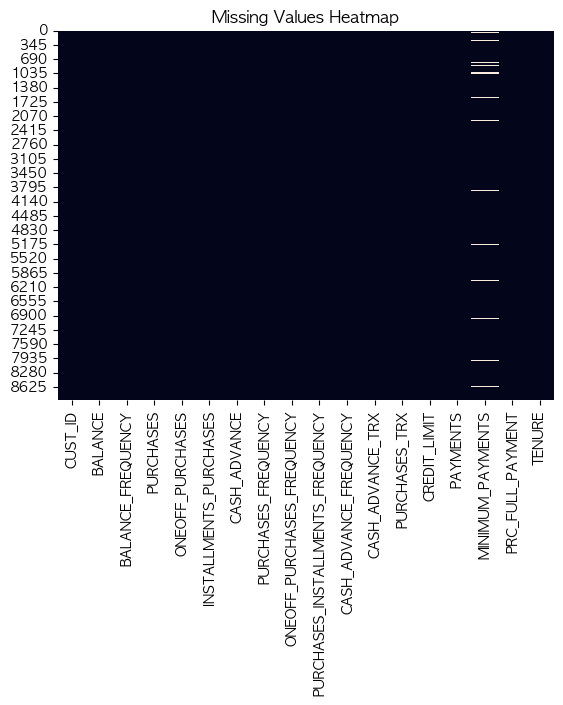

In [9]:
# 결측치 시각화
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

- CREDIT_LIMIT에 결측치가 1개, MINIMUM_PAYMENTS에 결측치가 313개 존재

## 1.4 데이터 분포 시각화 - 히스토그램
각 변수의 데이터 분포를 히스토그램으로 시각화

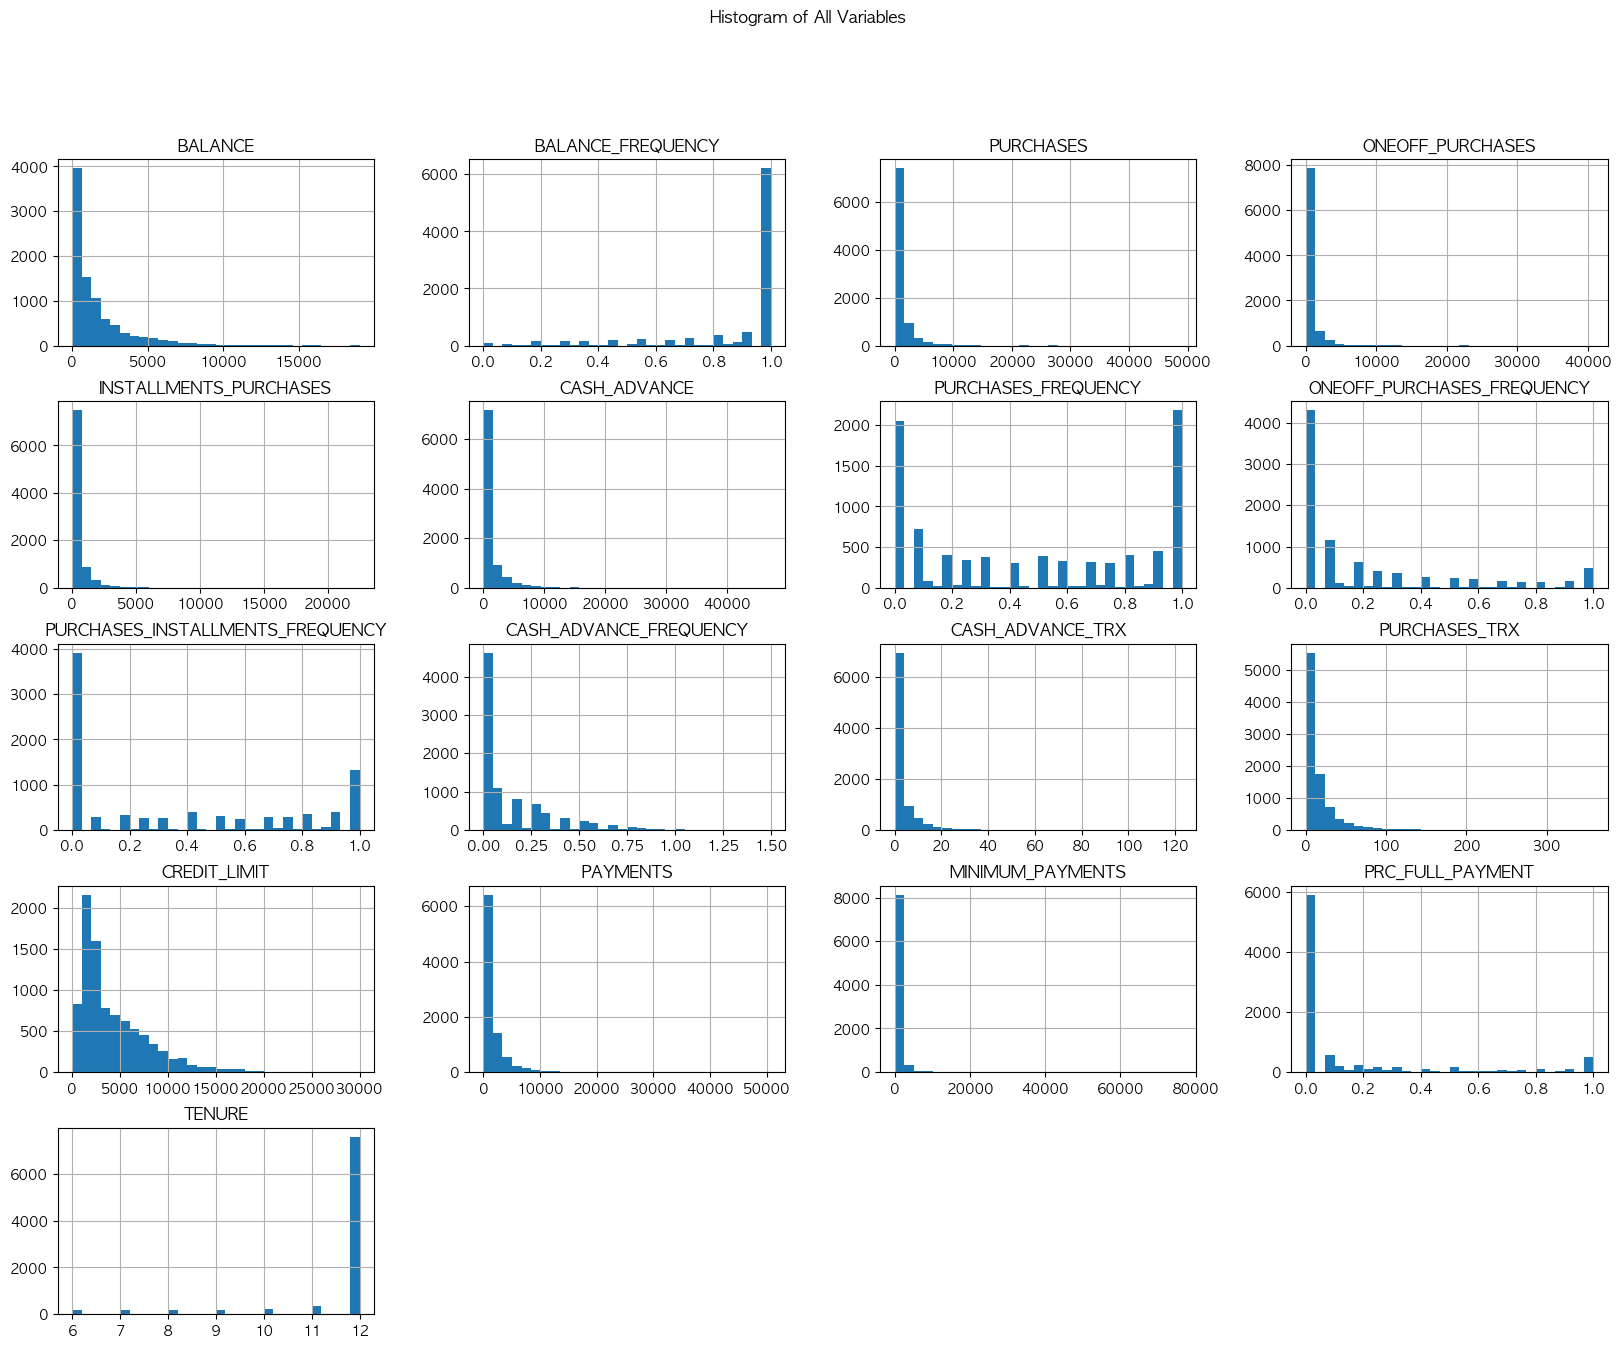

In [10]:
# 히스토그램 시각화
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histogram of All Variables')
plt.show()

**📋 시각화 결과 해석**

- 대부분의 변수들이 비대칭적인 분포를 가지고 있고, 분포가 오른쪽으로 길게 늘어져 있는 모양을 나타냄(positively skewed, right skewed) 
  - 일부 고객들이 매우 큰 값을 가지고 있는 것을 알 수 있다.

- 구매 관련 변수들 (PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES) 의 분포가 비슷한 패턴
  - 대다수의 고객들이 낮은 금액을 소비하고 일부 고객들이 매우 큰 금액을 소비

- 대다수의 고객들이 낮은 빈도로 구매를 하지만, 일부 고객들은 매우 빈번하게 구매
  - 빈도 관련 변수들 (ONEOFF_PURCHASES_FREQUENCY, INSTALLMENTS_PURCHASES_FREQUENCY) 참고

- 대부분 12개월 동안 카드를 사용
  - 카드 소지 기간 (TENURE) 참고

## 1.6 데이터의 이상치 파악

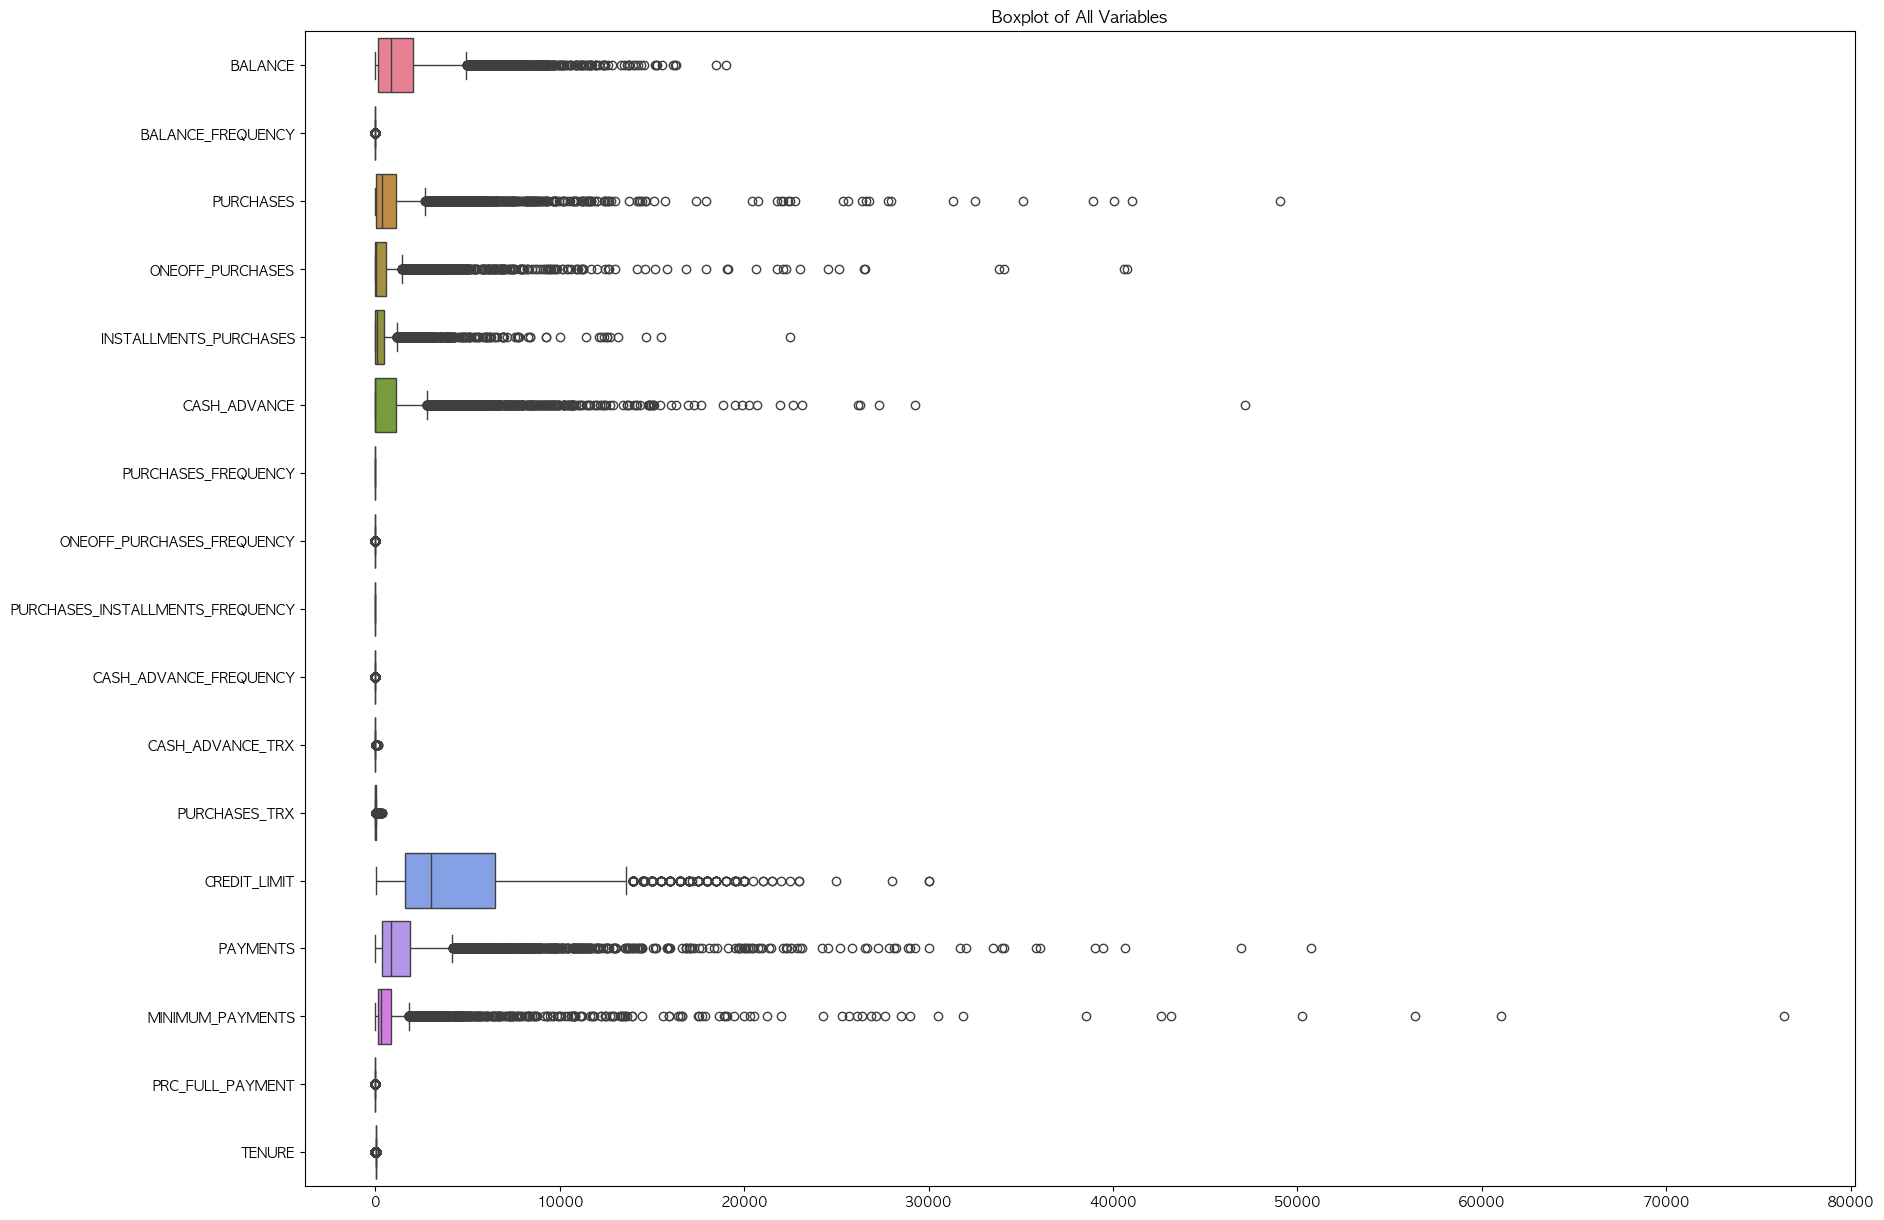

In [11]:
# 박스플롯 시각화
plt.figure(figsize=(20, 15))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of All Variables')
plt.show()

# **2. 데이터 전처리**

### 2.1 결측치 처리
-  변수의 결측치 수를 확인하고, 결측치가 존재하는 변수들을 적절한 방법으로 전처리

**앞서 CREDIT_LIMIT 변수에는 결측치가 1개 존재하고, MINIMUM_PAYMENTS 변수에는 결측치가 313개 존재함을 확인**

In [12]:
# 결측치 처리 : 중앙값 대체
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [13]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## 2.1 이상치 처리

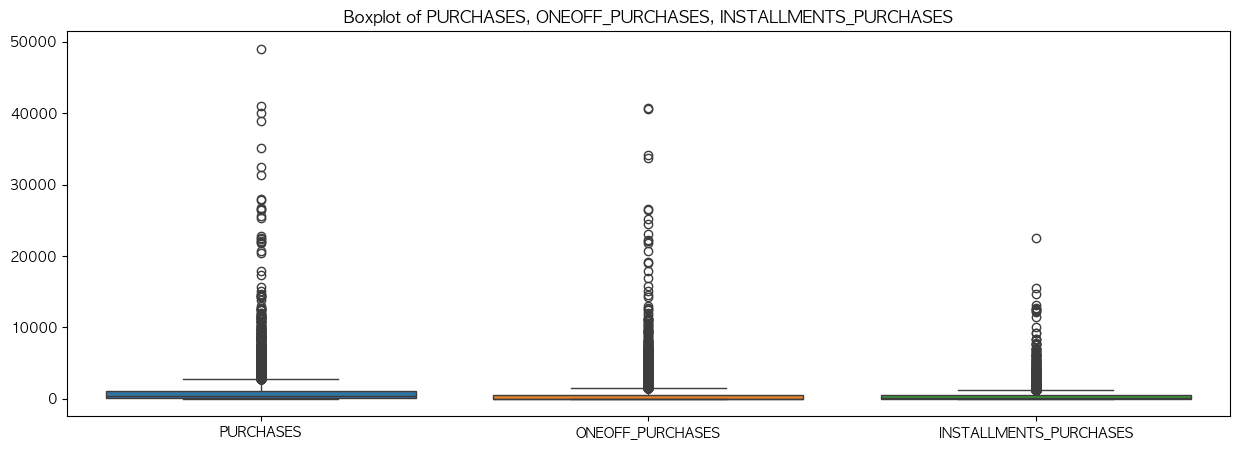

In [14]:
# 이상치 제거 전 시각화
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']])
plt.title('Boxplot of PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES')
plt.show()

In [15]:
# 이상치 제거 (전처리 진행) - IQR 방법으로 이상치 제거

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

In [16]:
# PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES 변수의 이상치 제거
df = remove_outliers(df, 'PURCHASES')
df = remove_outliers(df, 'ONEOFF_PURCHASES')
df = remove_outliers(df, 'INSTALLMENTS_PURCHASES')

In [17]:
df.shape

(6590, 18)

- PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES 변수에 대해서 이상치를 제거한 후에 6590명의 고객 데이터가 남은 것 확인

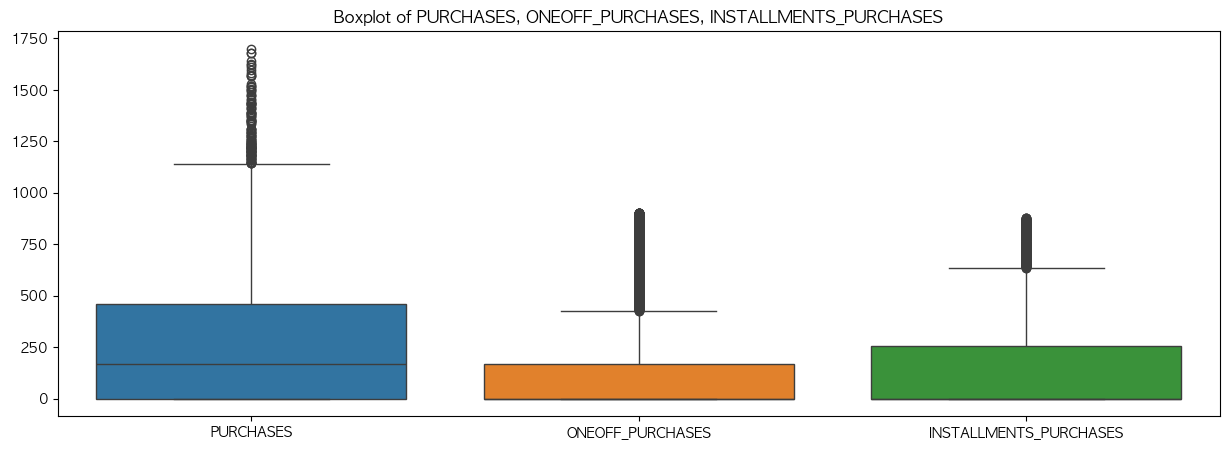

In [18]:
# 이상치 제거 후 시각화
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']])
plt.title('Boxplot of PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES')
plt.show()

## 2.2 데이터 스케일링
- 각 변수의 데이터를 표준화 혹은 정규화

**🔎 데이터 스케일링**

- 표준화 (StandardScaler)

  - 평균이 0, 표준편차가 1인 데이터로 스케일링
  - (데이터 - 데이터의 평균) / 데이터의 표준편차

- 정규화 (MinMaxScaler)

  - 데이터를 범위가 0과 1사이인 데이터로 스케일링
  - (데이터 - 데이터의 최소값) / (데이터의 최대값 - 데이터의 최소값)

In [19]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.2,0.000000,1.000000,0.000000,1.000000,0.00,0,12,2300.0,679.065082,532.033990,0.000000,12


In [20]:
# 'CUST_ID' 열 제외
numeric_df = df.drop('CUST_ID', axis=1)

In [21]:
# 표준화 (StandardScaler)
scaler1 = StandardScaler()
standardized_df = scaler1.fit_transform(numeric_df)
standardized_df = pd.DataFrame(standardized_df)

In [22]:
# 정규화 (MinMaxScaler)
scaler2 = MinMaxScaler()
normalized_df = scaler2.fit_transform(numeric_df)
normalized_df = pd.DataFrame(normalized_df)

이후 분석은 표준화된 데이터를 바탕으로 진행

In [23]:
standardized_df.columns = numeric_df.columns

In [24]:
X = standardized_df
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.723559,-0.140049,-0.576458,-0.577244,-0.251225,-0.512231,-0.549044,-0.519520,-0.539364,-0.737862,-0.504938,-0.534103,-0.901351,-0.486617,-0.310513,-0.469823,0.390976
1,0.918073,0.213507,-0.878080,-0.577244,-0.688066,2.573748,-0.989312,-0.519520,-0.768867,0.474074,0.052509,-0.770501,0.979061,1.392037,0.154685,0.389594,0.390976
2,0.550800,0.567062,1.566423,2.915936,-0.688066,-0.512231,1.652292,4.377859,-0.768867,-0.737862,-0.504938,0.647890,1.135762,-0.284237,-0.067262,-0.469823,0.390976
3,-0.320202,0.567062,-0.827494,-0.504956,-0.688066,-0.512231,-0.769179,-0.111407,-0.768867,-0.737862,-0.504938,-0.652302,-0.838671,-0.257141,-0.258009,-0.469823,0.390976
4,0.202128,0.567062,0.501037,-0.577244,1.309316,-0.512231,1.652292,-0.519520,1.985182,-0.737862,-0.504938,0.647890,-0.493929,-0.256789,-0.114763,-0.469823,0.390976


# **3. 모델링 - 클러스터 분석**

## 3.1 K-means 클러스터링

In [25]:
# 라이브러리 불러오기
from sklearn.cluster import KMeans

# k-means 모델 학습
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(X)

# k-means 클러스터링 할당 결과
df['kmeans_cluster'] = kmeans.predict(X)
df['kmeans_cluster'].value_counts()

kmeans_cluster
1    3681
0    1906
2    1003
Name: count, dtype: int64

### 클러스터링 결과 시각화 (2D)
- 두 개의 주요 변수(BALANCE, PURCHASES)를 사용하여 클러스터링 결과를 2D로 시각화

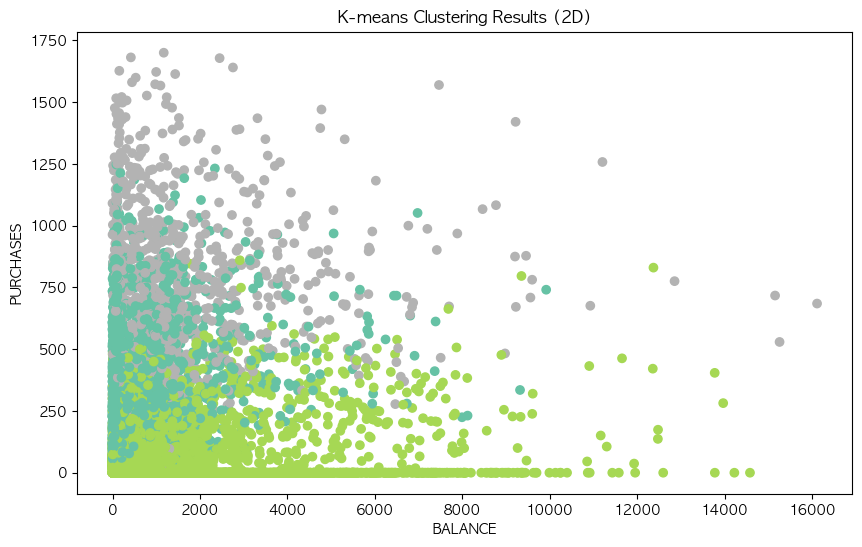

In [26]:
# k-means 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['BALANCE'], df['PURCHASES'], c=df['kmeans_cluster'], cmap='Set2')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.title('K-means Clustering Results (2D)')
plt.show()

### 클러스터 수 결정 (Elbow Method)
- Elbow Method를 사용하여 최적의 클러스터 수를 결정

In [27]:
# Elbow Method를 바탕으로 최적의 클러스터 개수 k 결정
inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

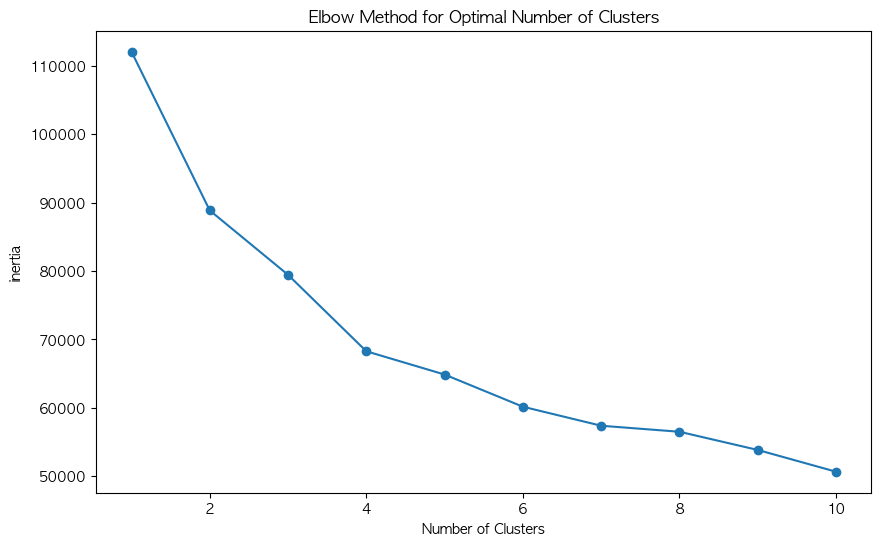

In [28]:
# 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

### 결과 해석

- 클러스터의 수를 5로 진행하고, 2가지 변수(BALANCE, PURCHASES)로 시각화
- 결과를 보고 추가 분석을 진행

In [29]:
df.drop(columns=['kmeans_cluster'], inplace=True)

In [30]:
# k-means 클러스터링 (k=5)
model = KMeans(n_clusters=5, random_state=123)
df['kmeans_cluster'] = model.fit_predict(X)

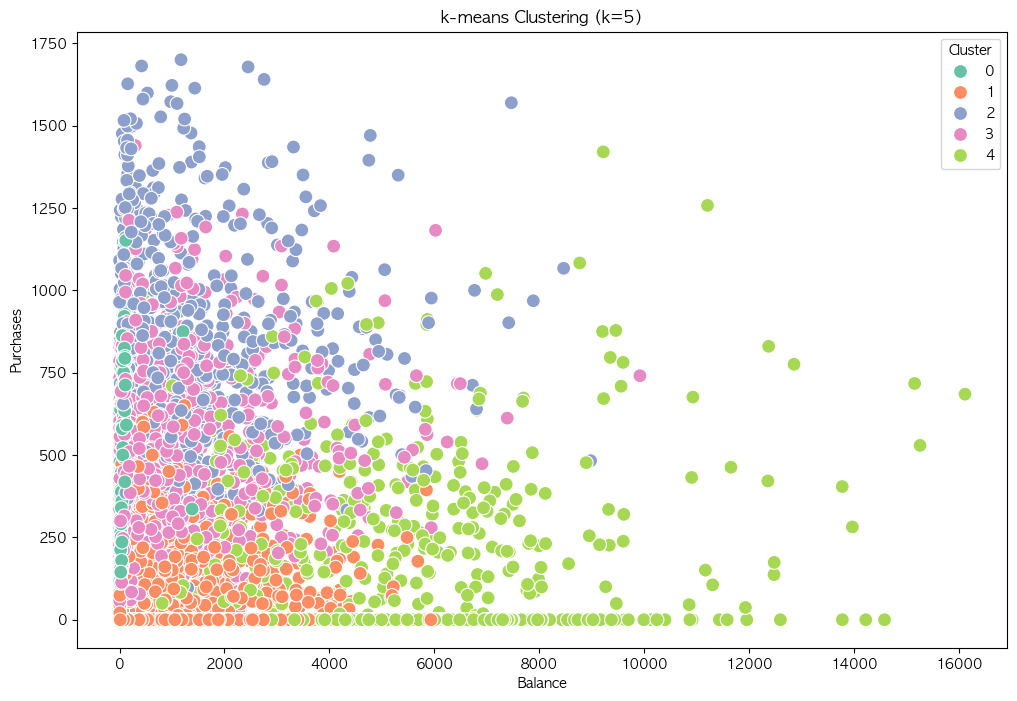

In [31]:
# k-means 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['BALANCE'], y=df['PURCHASES'], hue=df['kmeans_cluster'], palette='Set2', s=100)
plt.title('k-means Clustering (k=5)')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.legend(title='Cluster')
plt.show()

In [32]:
# 기술 통계량 집계를 위하여 CUST_ID 제외
df_kmeans = df.copy()
df_kmeans = df_kmeans.drop(columns=['CUST_ID'])

In [33]:
# 클러스터별 특성 분석
cluster_analysis = df_kmeans.groupby('kmeans_cluster').mean()
cluster_analysis['count'] = df_kmeans['kmeans_cluster'].value_counts()  # 클러스터별 고객 수
cluster_analysis

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,count
kmeans_cluster,,,,,,,,,,,,,,,,,,
0,45.327215,0.710491,355.306331,40.122321,315.377159,73.244153,0.639748,0.032779,0.567389,0.010698,0.230519,8.948052,3419.530205,645.495284,147.228660,0.772610,11.089286,616
1,1119.487614,0.814315,81.274155,58.232508,23.079737,751.447928,0.098296,0.046931,0.048706,0.149610,2.855289,1.433134,3077.550455,829.631358,579.036181,0.030121,11.418829,3006
2,1208.313377,0.926902,770.791538,596.768353,174.478570,468.933267,0.658276,0.509003,0.268253,0.093635,2.014423,14.368990,4556.643357,1164.231224,569.080848,0.124713,11.604567,832
3,841.357134,0.901791,465.778395,58.306000,408.426266,321.941951,0.841954,0.049170,0.795629,0.059615,1.200000,14.526996,2924.190959,787.021565,767.880037,0.074695,11.516350,1315
4,4808.480279,0.958096,137.937856,84.078222,54.010268,4787.019157,0.150569,0.060488,0.090641,0.475555,14.492083,2.533496,7976.863027,3768.681130,2080.538636,0.039123,11.485993,821


**📋 결과 해석**

- **클러스터 간 분포**
  - Cluster 0
    -  잔액이 매우 낮고, 구매액도 적은 고객들로 구성
  - Cluster 1 
    - 잔액이 낮고 구매액도 매우 낮은 고객들로 구성
  - Cluster 2
    - 잔액은 낮지만 구매액이 높은 고객들로 구성
  - Cluster 3
    - 잔액과 구매액이 모두 적당한 수준인 고객들로 구성
  - Cluster 4
    - 잔액이 높은 고객들로 구성되어 있으며, 잔액이 5000에서 16000 사이에 집중되어 있지만, 구매액은 상대적으로 낮은 경향을 보이는 고객들로 구성

- **클러스터 간 차이점**
  - 잔액 (BALANCE) 과 구매액 (PURCHASES) 의 상관관계 
    - 대체로 잔액이 많을수록 구매액도 많음
    - 그러나 클러스터에 따라서 잔액이 많아도 구매액이 적거나, 잔액이 적어도 구매액이 많은 경우가 있음
    - &rArr; 고객의 사용 패턴이 매우 다양

- **고객 세그먼트 전략**
  - Cluster 4
    - 잔액이 높고 구매액은 낮은 고객들
      - 저축형 고객들일 수 있음
    - &rArr; 추가 구매를 유도할 마케팅 전략이 필요하지 않을까?
  - Cluster 2
    - 구매액은 높지만 잔액이 낮은 고객들
      - 충성 고객
    - &rArr; 충성 고객 프로그램을 통해 이탈을 방지하는 전략이 필요하지 않을까?
  - Cluster 0,1
    - 잔액도 구매액도 낮은 고객들
      - 저활동 고객
    - &rArr; 신용 카드 사용을 더 활발하게 유도하기 위한 인센티브 제공을 고려할 수 있지 않을까?

## 3.2 계층적 클러스터링 모델
- 계층적 클러스터링
  - scipy를 사용하여 모델 학습
  - 덴드로그램을 시각화

In [34]:
# 라이브러리 불러오기
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [35]:
# 계층적 클러스터링 모델 생성
model = linkage(X, method='ward')

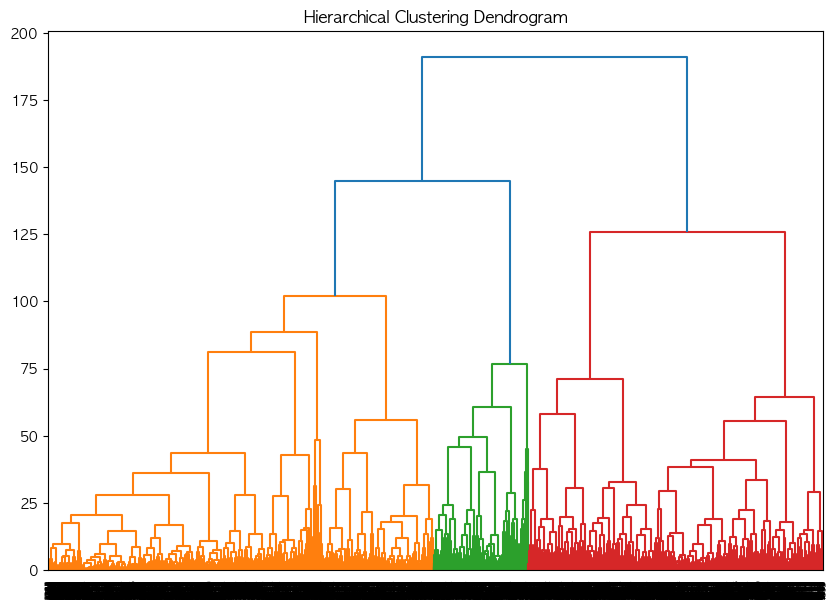

In [36]:
# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
dendrogram(model, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [37]:
# cut_tree를 사용하여 3개의 클러스터로 자르기
clusters = cut_tree(model, n_clusters=3)
df['hierarchical_cluster'] = clusters.flatten()  # 2차원 배열 반환

In [38]:
df['hierarchical_cluster'].value_counts()

hierarchical_cluster
0    3277
2    2509
1     804
Name: count, dtype: int64

**🔎 계층적 클러스터링 모델을 주로 사용하는 경우**

- 덴드로그램을 통해 데이터 간의 유사성과 관계를 시각적으로 파악하여 데이터의 구조를 알고자할 때

- 미리 클러스터의 수를 알지 못할 때

- 다양한 데이터 유형 (연속형 데이터, 범주형 데이터)에 적용하고자 할 때

- 데이터 셋이 작아서 계산 비용이 크지 않을 때

## 3.3 DBSCAN 클러스터링
- DBSCAN 알고리즘을 사용하여 클러스터링 모델을 학습

In [39]:
# DBSCAN 모델 학습
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X)
df['dbscan_cluster'].value_counts()

dbscan_cluster
-1     5330
 1      705
 2      134
 0      130
 6       62
 5       30
 13      25
 11      17
 22      15
 4       15
 15      15
 14      12
 8       12
 10       9
 17       8
 12       7
 3        7
 19       6
 26       6
 20       6
 9        5
 16       5
 7        5
 18       5
 21       5
 24       5
 25       5
 23       4
Name: count, dtype: int64

- **🔎 -1**
  - 노이즈 포인트
  - DBSCAN에서는 밀도가 낮은 지역에 위치한 데이터 포인트를 노이즈로 간주하고, 이들은 어떤 클러스터에도 속하지 않게 됨
  - **-1 (노이즈 포인트) 이 현재 5330개 데이터 포인트에서 발생**

### DBSCAN 클러스터링 모델 학습 (매개변수 조정)
- DBSCAN의 eps와 min_samples 값을 조정하여, 클러스터링 결과 개선

In [40]:
df.drop(columns='dbscan_cluster', inplace=True)

In [41]:
# DBSCAN 모델 학습 (매개변수 조정)
dbscan = DBSCAN(eps=0.9, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X)

In [42]:
df['dbscan_cluster'].value_counts()

dbscan_cluster
-1     3273
 0     3167
 22      10
 11       9
 8        8
 18       8
 2        7
 14       7
 5        7
 23       7
 3        7
 20       6
 15       6
 7        6
 16       5
 19       5
 1        5
 4        5
 12       5
 24       5
 21       5
 10       5
 6        5
 17       5
 13       4
 9        4
 25       4
Name: count, dtype: int64

- -1 (노이즈 포인트) 로 할당된 데이터 포인트의 개수가 3273개로 떨어졌으나 여전히 성능이 좋지 않음

### 클러스터링 결과 시각화 및 노이즈 탐지
- DBSCAN 결과를 시각화하고, 노이즈 데이터를 탐지

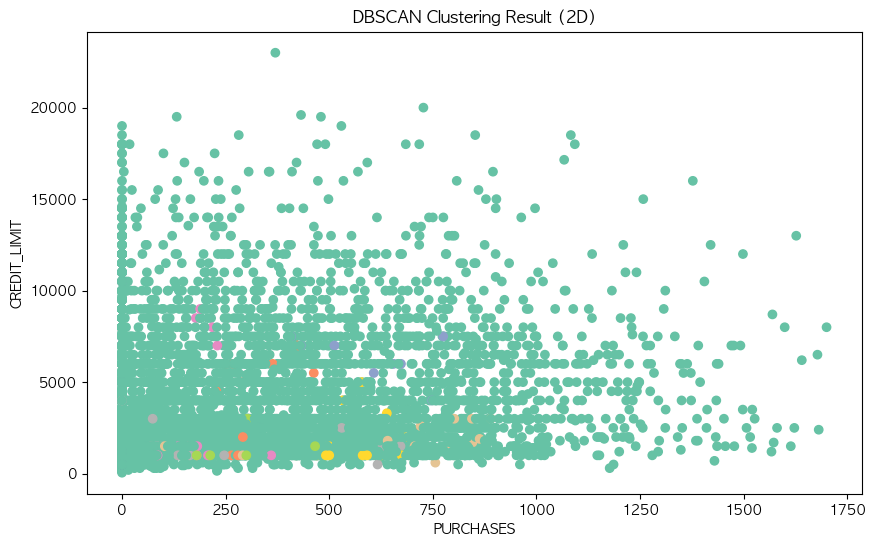

In [43]:
# DBSCAN 결과 시각화 (최적 매개변수 사용 후)
plt.figure(figsize=(10, 6))
plt.scatter(df['PURCHASES'], df['CREDIT_LIMIT'], c=df['dbscan_cluster'], cmap='Set2')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.title('DBSCAN Clustering Result (2D)')
plt.show()

In [44]:
# 노이즈 데이터 개수 확인
noise = df[df['dbscan_cluster'] == -1]

In [45]:
print(f"Number of Noise Points: {len(noise)}")

Number of Noise Points: 3273


## 3.4 GMM 클러스터링 모델 학습
- Gaussian Mixture Model을 사용하여 클러스터링 모델 학습

In [46]:
# GMM 모델 학습
gmm = GaussianMixture(n_components=3, random_state=123)
df['gmm_cluster'] = gmm.fit_predict(X)
df['gmm_cluster'].value_counts()

gmm_cluster
1    3164
2    1775
0    1651
Name: count, dtype: int64

### 클러스터링 결과 시각화 및 클러스터 확률 해석
- GMM 결과를 시각화하고, 각 데이터 포인트의 클러스터 소속 확률 확인

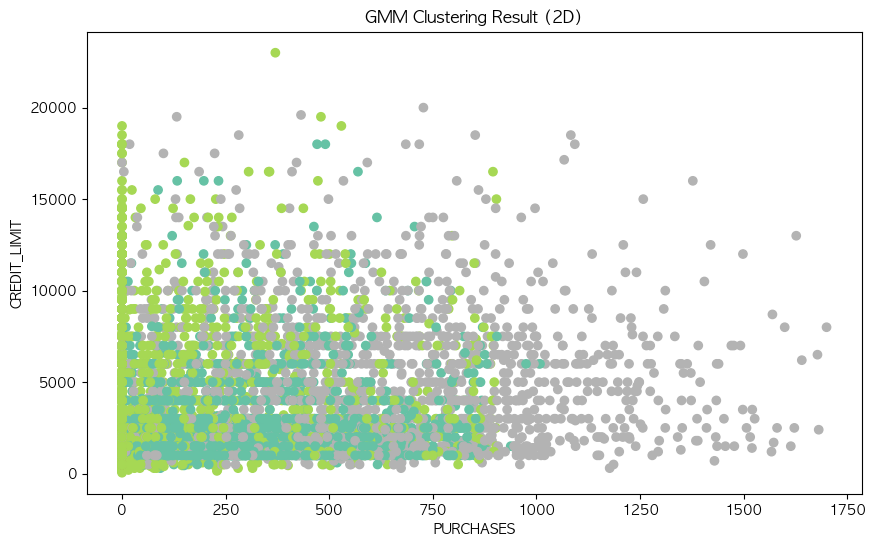

In [47]:
# GMM 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['PURCHASES'], df['CREDIT_LIMIT'], c=df['gmm_cluster'], cmap='Set2')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.title('GMM Clustering Result (2D)')
plt.show()

In [48]:
# 클러스터 소속 확률 확인
df['cluster_prob'] = gmm.predict_proba(X).max(axis=1)

In [49]:
df[['CUST_ID', 'gmm_cluster', 'cluster_prob']]

,CUST_ID,gmm_cluster,cluster_prob
0,C10001,0,0.999995
1,C10002,1,1.000000
2,C10003,2,0.999994
4,C10005,1,1.000000
7,C10008,0,0.999844
...,...,...,...
8943,C19184,1,1.000000
8945,C19186,0,1.000000
8946,C19187,0,1.000000
8947,C19188,0,1.000000


## 3.5 클러스터링 결과 해석 및 비교
- K-means, 계층적 클러스터링, DBSCAN, GMM의 클러스터링 결과 비교
- 각 방법의 장단점, 특징도 고려해서 결과 분석을 진행

In [50]:
# k-means
df['kmeans_cluster'].value_counts()

kmeans_cluster
1    3006
3    1315
2     832
4     821
0     616
Name: count, dtype: int64

In [51]:
# 계층적 클러스터링
df['hierarchical_cluster'].value_counts()

hierarchical_cluster
0    3277
2    2509
1     804
Name: count, dtype: int64

In [52]:
# DBSCAN
df['dbscan_cluster'].value_counts()

dbscan_cluster
-1     3273
 0     3167
 22      10
 11       9
 8        8
 18       8
 2        7
 14       7
 5        7
 23       7
 3        7
 20       6
 15       6
 7        6
 16       5
 19       5
 1        5
 4        5
 12       5
 24       5
 21       5
 10       5
 6        5
 17       5
 13       4
 9        4
 25       4
Name: count, dtype: int64

In [53]:
# GMM
df['gmm_cluster'].value_counts()

gmm_cluster
1    3164
2    1775
0    1651
Name: count, dtype: int64

**🔎 실루엣 계수 (클러스터 성능 지표)**
- 범위
  - -1에서 1까지
- 1에 가까울수록 성능이 좋다고 함

In [54]:
kmeans_silhouette = silhouette_score(X, df['kmeans_cluster'])
hierarchical_silhouette = silhouette_score(X, df['hierarchical_cluster'])
dbscan_silhouette = silhouette_score(X, df['dbscan_cluster'])
gmm_silhouette = silhouette_score(X, df['gmm_cluster'])

In [55]:
print("k-means 실루엣 계수 : ", kmeans_silhouette)
print("계층형 군집 실루엣 계수 : ", hierarchical_silhouette)
print("DBSCAN 실루엣 계수 : ", dbscan_silhouette)
print("GMM 실루엣 계수 : ", gmm_silhouette)

k-means 실루엣 계수 :  0.24080212797626038
계층형 군집 실루엣 계수 :  0.18601719390822796
DBSCAN 실루엣 계수 :  -0.3594203832561069
GMM 실루엣 계수 :  0.15052547806259794


# **4. PCA**


## 4.1 PCA의 주성분 계산 및 시각화
- 주성분 분석(PCA)을 사용하여 주성분을 계산

In [56]:
# PCA 모델 학습
pca = PCA(n_components=2)

In [57]:
# 주성분 데이터 프레임 생성
pc = pca.fit_transform(X)
pca_df = pd.DataFrame(data=pc, columns=['PC1', 'PC2'])

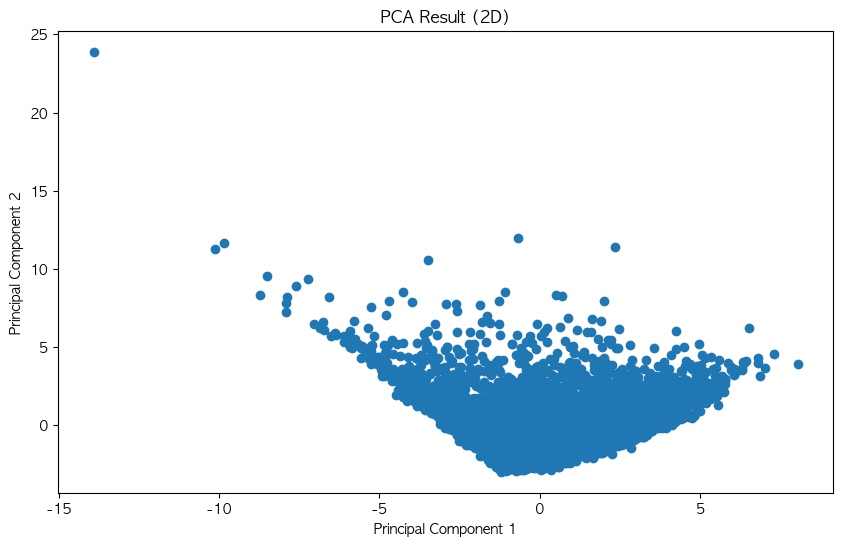

In [58]:
# PCA 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result (2D)')
plt.show()

## 4.2 적절한 주성분 수 결정
- 주성분의 설명력(분산 설명 비율)을 시각화

In [59]:
# PCA 모델 학습 (전체 주성분)
pca_full = PCA()
pca_full.fit(X)

PCA()

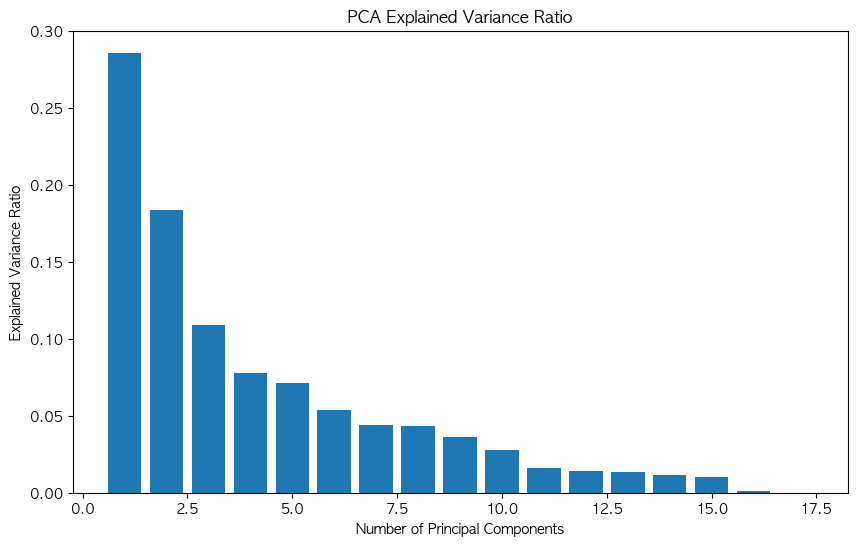

In [60]:
# Scree Plot (설명된 분산 비율 시각화)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca_full.explained_variance_ratio_) + 1), pca_full.explained_variance_ratio_)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.show()

## 4.3 차원 축소를 활용한 데이터 시각화
- 적절한 주성분 수를 선택한 후, 이를 사용하여 데이터를 저차원으로 변환
- 데이터 시각화를 진행

In [61]:
# 주성분의 개수 설정 (예 : 3개)
pca_optimal = PCA(n_components=3)
pc_optimal = pca_optimal.fit_transform(X)

In [62]:
pca_optimal_df = pd.DataFrame(pc_optimal, columns=['PC1', 'PC2', 'PC3'])

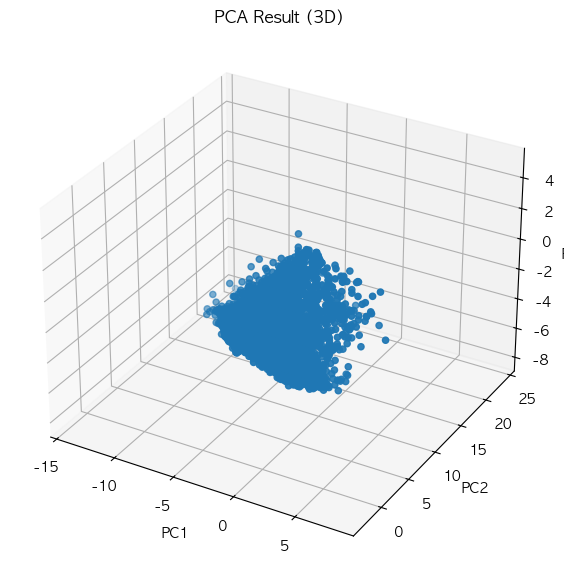

In [63]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # 111 : 1행 1열의 유일한 서브플롯을 생성
scatter = ax.scatter(pca_optimal_df['PC1'], pca_optimal_df['PC2'], pca_optimal_df['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA Result (3D)')
plt.show()

# **5. PCA 활용 클러스터링**


- CUST_ID를 제외하면 분석 중인 데이터에 총 17개의 열
  - 차원이 너무 많아서 데이터의 분포나 특징을 시각화로 파악하기 어려움
    - &rarr; PCA를 통해 모든 차원의 특징을 최대한 살리면서, 동시에 데이터의 특징을 한눈에 파악할 수 있도록 2차원으로 차원 축소

## 5.1 PCA 활용한 차원 축소 후 K-means 클러스터링
- PCA를 통해 차원 축소한 데이터를 사용하여 K-means 클러스터링을 수행
-  최적의 군집 개수를 Elbow plot를 통해 확인


In [64]:
# PCA를 통한 차원 축소
pca = PCA(n_components=2)

# PCA 학습
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df.head()

,0,1
0,-0.294164,-1.991673
1,-2.907777,1.075601
2,2.252548,2.495180
3,-0.800530,-1.706679
4,2.436059,0.245800


In [65]:
# Elbow Method를 바탕으로 한 Plot 그리기
inertias = []

for k in range(1, 10):
    model = KMeans(n_clusters=k)
    model.fit(pca_df)
    inertias.append(model.inertia_)

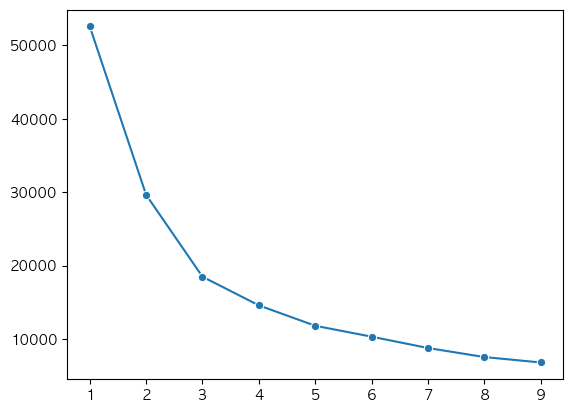

In [66]:
# 시각화
sns.lineplot(x=range(1, 10), y=inertias, marker='o')
plt.show()

### K-means 결과 해석
  - 각 클러스터별로 고객들의 특징
  - 위 분석을 토대로 대출 서비스를 제안

In [67]:
# k-means 클러스터링 (k=4)
model = KMeans(n_clusters=4)
model.fit(pca_df)
labels = model.labels_
x, y = pca_df[0], pca_df[1]

In [68]:
# PCA 데이터 프레임에 클러스터 레이블 부여
pca_km_df = pd.DataFrame({'PC1' : x, 'PC2' : y, 'kmeans_label' : labels})
pca_km_df.head()

,PC1,PC2,kmeans_label
0,-0.294164,-1.991673,1
1,-2.907777,1.075601,2
2,2.252548,2.495180,0
3,-0.800530,-1.706679,1
4,2.436059,0.245800,3


In [69]:
# 클러스터 레이블을 원본 데이터프레임 df에 추가
df['CUSTOMER_SEGMENT'] = labels

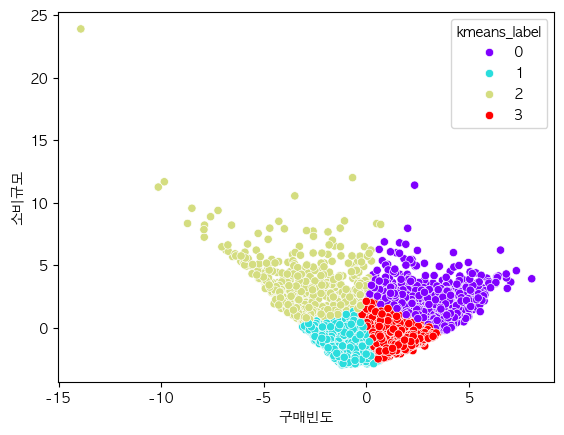

In [100]:
# 시각화
sns.scatterplot(data=pca_km_df, x='PC1', y='PC2', hue='kmeans_label', palette='rainbow')
plt.xlabel('구매빈도')
plt.ylabel('소비규모')
plt.show()

In [71]:
# PCA 모델
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [72]:
# 주성분 로딩 값 확인
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
loadings

,PC1,PC2
BALANCE,-0.227753,0.354904
BALANCE_FREQUENCY,-0.008452,0.242381
PURCHASES,0.342511,0.280847
ONEOFF_PURCHASES,0.159328,0.244728
INSTALLMENTS_PURCHASES,0.335048,0.158743
CASH_ADVANCE,-0.259303,0.339859
PURCHASES_FREQUENCY,0.386680,0.177617
ONEOFF_PURCHASES_FREQUENCY,0.159188,0.224040
PURCHASES_INSTALLMENTS_FREQUENCY,0.347982,0.113409
CASH_ADVANCE_FREQUENCY,-0.279483,0.275352


**📋 로딩값 해석**

- **PC1 해석**

  - PURCHASES_FREQUENCY (0.386680)
    - PC1에서 가장 큰 기여를 하는 변수
    - 부호가 양이므로 PC1 값이 커질수록 PURCHASES_FREQUENCY (구매 빈도) 가 높은 고객

  - PURCHASES (0.342511)
    - PC1 값이 커질수록 구매 금액이 커지는 경향을 보임
    - &rarr; PC1은 구매 빈도가 높은 고객일수록 더 큰 값을 가짐

- **PC2 해석**

  - BALANCE (0.354953)
    - PC2에서 가장 중요한 변수
    - PC2가 커질수록 잔고도 증가

  - CASH_ADVANCE (0.339859)
    - PC2가 커질수록 현금 서비스 이용금액 증가

  - PURCHASES (0.280847)
    - PC2가 커질수록 구매 금액 증가

  - &rArr; PC2는 소비 규모와 관련된 주성분으로 정의

- **해석 참고**
  - 가정 
    - 고객의 소비 패턴에 대한 클러스터링

  - k=4
    - PC1 
      - 구매 빈도
    - PC2 
      - 소비 규모

- **그룹별 해석**

  - 군집 3 (빨간색) 
    - PC1 (구매 빈도) 가 낮지만, PC2 (소비 규모) 가 매우 큼
    - 자주 구매하지는 않지만 한 번 소비할 때 큰 금액을 지출하는 경향
    - 예시
      - 고가 제품을 가끔씩 구매하거나, 고급서비스 이용 시 큰 비용을 지불하는 고객군

  - 군집 2 (연두색) 
    - PC1 (구매 빈도)와 PC2 (소비 규모) 모두 높은 편
    - 자주 구매하고, 한 번 소비할 때도 큰 금액을 지출하는 고객으로 해석 가능하여 활발한 고객

  - 군집 1 (하늘색)
    - 자주 소비하지는 않지만, 꾸준한 소비를 유지하는 고객

  - 군집 0 (보라색)
    - 소비 빈도, 소비 규모는 중간 정도인 고객

- **최종 : 클러스터별 대출전략**

  - 군집 3 (빨간색) 
    - 고액 지출, 소비 빈도 낮은 고객
    - 예시
      - 대형 전자기기, 차량, 가구 등 고가 구매 시 낮은 이자율을 제공하는 맞춤형 대출 상품 제공

  - 군집 2 (연두색)
    - 소비 빈도와 소비 규모가 모두 높은 VIP 고객
    - 예시
      - 고소득 VIP 고객을 대상으로 명품 브랜드, 고급 레스토랑, 호텔패키지와 연계하여 높은 소비 패턴에 맞는 고급 맞춤형 대출 상품 제공


## 5.2 PCA를 활용한 차원 축소 후 계층적 클러스터링
- PCA를 통해 차원 축소한 데이터를 사용하여 계층적 클러스터링을 수행

In [73]:
# 계층적 군집 모델
model = linkage(x_pca, method='ward')

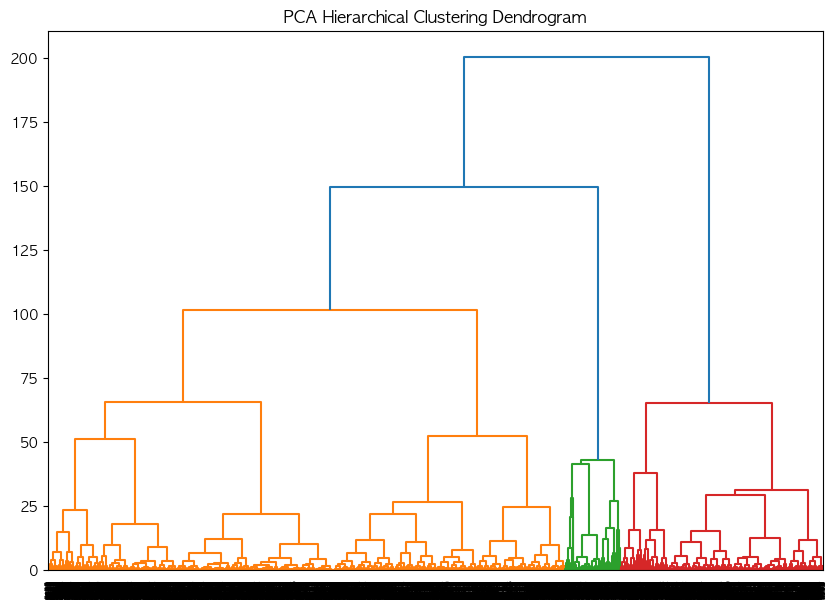

In [74]:
# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
dendrogram(model, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('PCA Hierarchical Clustering Dendrogram')
plt.show()

In [75]:
# cut_tree를 사용하여 4개의 클러스터
clusters = cut_tree(model, n_clusters=4)
pca_hierarchical_df = pd.DataFrame(x_pca)
pca_hierarchical_df['hierarchical_label'] = clusters

In [76]:
pca_hierarchical_df.head()

,0,1,hierarchical_label
0,-0.294164,-1.991673,0
1,-2.907777,1.075601,1
2,2.252548,2.495180,2
3,-0.800530,-1.706679,0
4,2.436059,0.245800,2


In [77]:
pca_hierarchical_df['hierarchical_label'].value_counts()

hierarchical_label
1    2430
0    1968
2    1725
3     467
Name: count, dtype: int64

## 5.3 PCA를 활용한 차원 축소 후 DBSCAN 클러스터링
- PCA를 통해 차원 축소한 데이터를 사용하여 DBSCAN 클러스터링을 수행

In [78]:
# DBSCAN 모델
model = DBSCAN(eps=0.5, min_samples=5)
model.fit(x_pca)

DBSCAN()

In [79]:
pca_dbscan_df = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])

In [80]:
pca_dbscan_df['dbscan_label'] = model.labels_

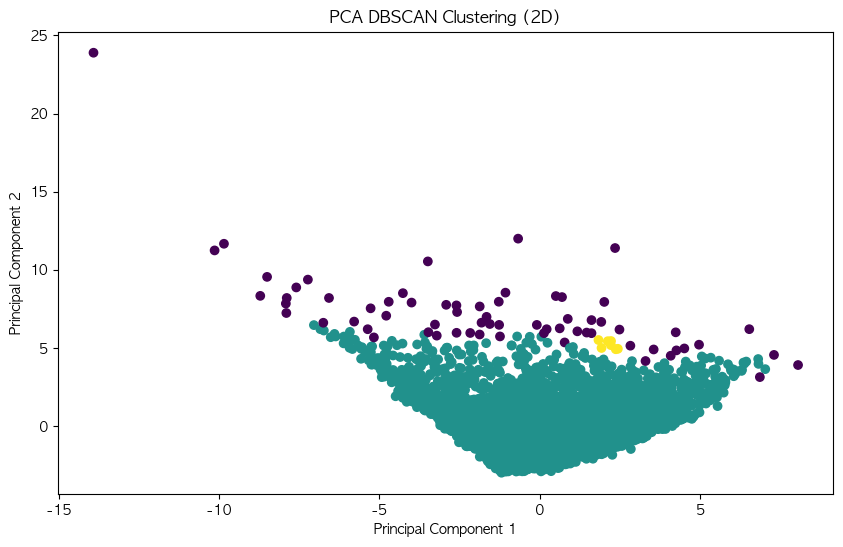

In [81]:
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(pca_dbscan_df['PC1'], pca_dbscan_df['PC2'], c=pca_dbscan_df['dbscan_label'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA DBSCAN Clustering (2D)')
plt.show()

## 5.4 PCA를 활용한 차원 축소 후 GMM 클러스터링
- PCA를 통해 차원 축소한 데이터를 사용하여 GMM 클러스터링을 수행하고 결과 시각화

In [82]:
# GMM 모델 학습
model = GaussianMixture(n_components=3, random_state=123)
model.fit(x_pca)

GaussianMixture(n_components=3, random_state=123)

In [83]:
pca_gmm_df = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])
pca_gmm_df['gmm_label'] = model.predict(x_pca)

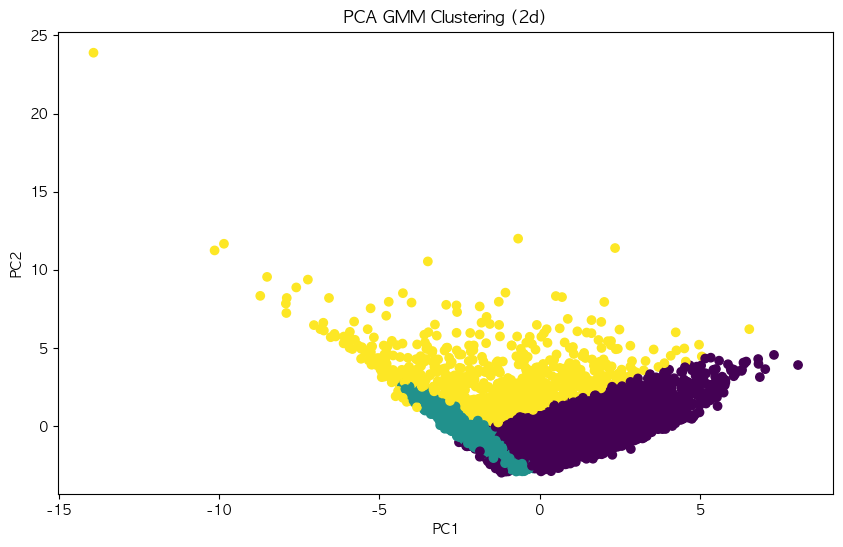

In [84]:
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(pca_gmm_df['PC1'], pca_gmm_df['PC2'], c=pca_gmm_df['gmm_label'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA GMM Clustering (2d)')
plt.show()

## 5.5 원본 데이터와 차원 축소 데이터를 사용한 클러스터링 결과 비교
- 원본 데이터와 차원 축소 데이터를 사용하여 다양한 클러스터링 기법을 적용한 결과를 비교

In [85]:
pca_kmeans_silhouette = silhouette_score(x_pca, pca_km_df['kmeans_label'])
pca_hierarchical_silhouette = silhouette_score(x_pca, pca_hierarchical_df['hierarchical_label'])
pca_dbscan_silhouette = silhouette_score(x_pca, pca_dbscan_df['dbscan_label'])
pca_gmm_silhouette = silhouette_score(x_pca, pca_gmm_df['gmm_label'])

print("k-means 실루엣 계수 : ", pca_kmeans_silhouette)
print("계층형 군집 실루엣 계수 : ", pca_hierarchical_silhouette)
print("DBSCAN 실루엣 계수 : ", pca_dbscan_silhouette)
print("GMM 실루엣 계수 : ", pca_gmm_silhouette)

k-means 실루엣 계수 :  0.4131861738796269
계층형 군집 실루엣 계수 :  0.3471256928451311
DBSCAN 실루엣 계수 :  0.4177798220857564
GMM 실루엣 계수 :  0.32175592142796083


In [86]:
pca_km_df['kmeans_label'].value_counts()

kmeans_label
1    2797
3    1953
0     991
2     849
Name: count, dtype: int64

In [87]:
pca_hierarchical_df['hierarchical_label'].value_counts()

hierarchical_label
1    2430
0    1968
2    1725
3     467
Name: count, dtype: int64

In [88]:
pca_dbscan_df['dbscan_label'].value_counts()

dbscan_label
 0    6516
-1      67
 1       7
Name: count, dtype: int64

In [89]:
pca_gmm_df['gmm_label'].value_counts()

gmm_label
0    3664
1    2126
2     800
Name: count, dtype: int64

# **6. 클러스터별 분석**

In [90]:
# --- Add K-Means Prediction to Data Frame ----
df['CUSTOMER_SEGMENT'] = 'Cluster ' + df['CUSTOMER_SEGMENT'].astype(str)

# --- Calculating Overall Mean from Current Data Frame ---
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = df.describe().loc[['mean']].T

# --- Summarize Mean of Each Cluster ---
# 숫자형 열만 선택
numeric_columns = df.select_dtypes(include='number').columns.tolist()
df_cluster_summary = df.groupby('CUSTOMER_SEGMENT')[numeric_columns].mean().T.reset_index()
df_cluster_summary.columns = ['Column Name'] + list(df_cluster_summary.columns[1:])  # Rename columns for clarity
df_cluster_summary.set_index('Column Name', inplace=True)

# --- Combining Both Data Frame ---
df_profile = df_cluster_summary.join(df_profile_overall, rsuffix='_Overall').reset_index()

# --- Display the Profile DataFrame with Background Gradient ---
df_profile.style.background_gradient(cmap='YlOrBr')


,Column Name,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Overall
0,BALANCE,1229.320394,1144.445557,4724.380800,523.448525,1434.380122
1,BALANCE_FREQUENCY,0.963746,0.803821,0.965019,0.822565,0.854192
2,PURCHASES,800.012079,60.877233,149.083734,379.193682,277.727305
3,ONEOFF_PURCHASES,360.945540,47.054927,101.651072,136.386446,127.765425
4,INSTALLMENTS_PURCHASES,439.506529,13.846260,47.578327,243.505479,150.263909
5,CASH_ADVANCE,512.580269,816.699720,4657.803838,154.054337,1069.441539
6,PURCHASES_FREQUENCY,0.874950,0.072672,0.161673,0.645384,0.374512
7,ONEOFF_PURCHASES_FREQUENCY,0.328635,0.038783,0.078097,0.101699,0.106081
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.665149,0.031192,0.084243,0.523219,0.279177
9,CASH_ADVANCE_FREQUENCY,0.086961,0.158377,0.477810,0.034934,0.152207


In [101]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,kmeans_cluster,hierarchical_cluster,dbscan_cluster,gmm_cluster,cluster_prob,CUSTOMER_SEGMENT,TOTAL_REVENUE,MAIN_CHANNEL,CREDIT_UTILIZATION,PAYMENT_RATIO
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,1,0,0,0,0.999995,Cluster 1,2.419259,INSTALLMENTS,4.09,1.446508
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4,1,-1,1,1.000000,Cluster 2,104.460298,CASH_ADVANCE,45.75,3.826241
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,2,2,-1,2,0.999994,Cluster 0,46.652761,ONEOFF_PURCHASES,33.27,0.991682
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1,0,0,1,1.000000,Cluster 1,10.541429,ONEOFF_PURCHASES,68.14,2.771075
7,C10008,1823.652743,1.000000,436.20,0.00,436.2,0.000000,1.000000,0.000000,1.000000,...,3,2,0,0,0.999844,Cluster 3,31.519659,INSTALLMENTS,79.29,1.276357


**📋 데이터 기반 각 클러스터별 특성과 맞춤형 마케팅 전략**
- **클러스터 0: 새싹🌱'**고객(주로 소액 결제에만 사용하는 고객)
  
  - 특성

    - 잔액(BALANCE)과 지출(PURCHASE)이 낮고, 신용한도(CREDIT_LIMIT)도 비교적 낮음
    - 할부 구매 빈도(PURCHASES_INSTALLMENTS_FREQUENCY)와 일시불 구매 빈도(ONEOFF_PURCHASES_FREQUENVY)가 낮아 자주 구매하지 않음
    - 현금 서비스 빈도(CASH_ADVANCE_FREQUENCY)도 낮은 편
    - &rArr; 신용카드를 적게 사용하거나 주로 소액 결제에만 활용하는 고객

  - 목표
    - 신용카드 사용 빈도 높이기
    - 결제 금액 증대
  
  - 마케팅 전략

    - 생활 밀착형 가맹점 제휴 확대(소액 결제 특화)
      - 편의점, 카페 등 소액 결제가 빈번한 곳과 제휴하여 할인 혜택이나 포인트 적립 제공
    - 온라인 컨텐츠 구독 서비스 제휴
      - OTT, 음원, 웹툰 플랫폼 등과 제휴해 소액 결제로 즐길 수 있는 컨텐츠 제공
    - 게임 요소 도입
      - 소액 결제를 게임처럼 만들어 참여를 유도
      - 예시  
        - 네이버페이, 토스의 소액 결제 시 랜덤 포인트 적립
        - 누적 결제 금액에 따라 추가 혜택(포인트 적립, 할인 쿠폰) 제공 등
  
- **클러스터 1: 할부💳**마니아 고객(할부 구매 빈도가 매우 높은 고객)

  - 특성

    - 지출 빈도(PURCHASES_FREQUENCY)와 할부 구매 빈도(PURCHASES_INSTALLMENTS_FREQUENCY)가 매우 높음
      - 할부를 많이 이용
    - 일시불 구매 빈도(ONEOFF_PURCHASES_FREQUENCY)도 높은 편
    - 신용 한도(CREDIT_LIMIT)는 중간 정도로 지출 관리에 신경 쓰는 편
    - 현금 서비스 이용은 적음

  - 목표
  
    - 충성도 높이기
    - 장기적 관계 유지

  - 마케팅 전략

    - VIP 고객 서비스
      - 차별화된 서비스 제공
    - 할부 관련 혜택 확대
      - 할부 구매 시 더 높은 포인트 적립률, 무이자 할부 기간 확대 등 혜택 제공
    - 라이프스타일 맞춤 혜택
      - 여행이나 문화, 교육 등 고객 관심 분야 특화 할인 및 포인트 관련 혜택 제공 
  
- **클러스터 2: 현금💸** 고객

  - 특성
  
    - 잔액(BALANCE), 현금 서비스(CASH_ADVANCE) 및 현금 서비스 빈도(CASH_ADVANCE_FREQUENCY)가 높음
      - 반면 지출 빈도(PURCHASES_FREQUENCY)는 낮아 현금 서비스에 의존
    - 최소 결제 금액(MINIMUM_PAYMENTS)도 높아 채무 상환 부담이 있을 수 있음
  
  - 목표
  
    - 현금 서비스 의존도를 낮추고, 안전한 신용카드 사용을 유도
  
  - 전략
  
    - 현금 서비스 한도 관리 컨설팅
      - 고객의 소비 패턴을 분석해 적정 현금 서비스 한도를 설정하고 효율적인 자금 관리 방법을 컨설팅
    - 소비 습관 개선 프로그램
      - 과도한 지출을 줄이고 계획적인 소비 습관을 형성할 수 있도록 도움
    - 자금 대출 상품 안내
      - 낮은 금리의 대출 상품을 안내하여 현금 서비스 의존도를 낮추고 고객의 금융 부담 완화
  
  - **클러스터 3: 잊혀진😥** 카드 고객
  
    - 특징 
      - 잔액(BALANCE)과 현금 서비스(CASH_ADVANCE)는 중간 수준이지만 지출 빈도(PURCHASES_FREQUENCY)가 매우 낮음
      - 일시불 및 할부 구매 빈도(ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY) 모두 낮아 비정기적 이용 패턴을 보임
      - 신용 한도(CREDIT_LIMIT)는 클러스터 0과 1보다 높으나 사용 빈도가 적음
      - 신용 카드를 거의 사용하지 않거나 특정 상황에서만 제한적 사용
  
    - 목표
  
      - 휴면 고객 활성화 및 신용카드 사용 빈도 높이기

    - 전략
  
      - 맞춤형 혜택 제공
        - 고객의 과거 구매 이력 및 관심사를 분석해 맞춤형 혜택과 프로모션 제공
      - 카드 혜택 알림 서비스
        - 고객이 관심 가질 만한 카드 혜택 정보를 문자나 이메일, 앱 푸시 알림 등을 통해 발송해 카드 사용 유도
      - 이벤트나 프로모션 참여 기회 제공
        - 다양한 이벤트 및 프로모션 참여 기회를 제공해 고객의 관심과 참여 유도
      - 휴면 계좌 해지 방지
        - 휴면 계좌 해지 방지를 위해 특별 혜택을 제공

In [91]:
df['TOTAL_REVENUE'] = (
  df['PURCHASES'] * 0.02 +  # 가맹점 수수료 2% 가정
  df['CASH_ADVANCE'] * 0.01 +  # 현금인출 수수료 1% 가정
  df['BALANCE'] * (0.15/12)  # 연이자 15% 가정
)

profitability = df.groupby('CUSTOMER_SEGMENT').agg({
  'TOTAL_REVENUE': ['mean', 'sum', 'count'],
  'BALANCE': 'mean',
  'CREDIT_LIMIT': 'mean'
}).round(2)
        
profitability

TOTAL_REVENUE                  BALANCE CREDIT_LIMIT
                          mean       sum count     mean         mean
CUSTOMER_SEGMENT                                                    
Cluster 0                36.49  36164.12   991  1229.32      4475.04
Cluster 1                23.69  66261.24  2797  1144.45      3100.94
Cluster 2               108.61  92213.69   849  4724.38      7819.79
Cluster 3                15.67  30598.67  1953   523.45      2967.68

In [92]:
behavior = df.groupby('CUSTOMER_SEGMENT').agg({
    'PURCHASES_FREQUENCY': 'mean',
    'PURCHASES_INSTALLMENTS_FREQUENCY': 'mean',
    'CASH_ADVANCE_FREQUENCY': 'mean',
    'PRC_FULL_PAYMENT': 'mean',
    'TENURE': 'mean'
}).round(3)

# 주요 사용 채널 식별
df['MAIN_CHANNEL'] = np.where(
    df['CASH_ADVANCE'] > df['PURCHASES'], 'CASH_ADVANCE',
    np.where(df['INSTALLMENTS_PURCHASES'] > df['ONEOFF_PURCHASES'], 
            'INSTALLMENTS', 'ONEOFF_PURCHASES')
)

channel_distribution = pd.crosstab(
    df['CUSTOMER_SEGMENT'], 
    df['MAIN_CHANNEL'], 
    normalize='index'
) * 100

In [93]:
behavior

,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE
CUSTOMER_SEGMENT,,,,,
Cluster 0,0.875,0.665,0.087,0.190,11.757
Cluster 1,0.073,0.031,0.158,0.049,11.366
Cluster 2,0.162,0.084,0.478,0.037,11.511
Cluster 3,0.645,0.523,0.035,0.227,11.351


In [94]:
channel_distribution

MAIN_CHANNEL,CASH_ADVANCE,INSTALLMENTS,ONEOFF_PURCHASES
CUSTOMER_SEGMENT,,,
Cluster 0,19.677094,45.307770,35.015136
Cluster 1,70.897390,10.976046,18.126564
Cluster 2,98.233216,0.824499,0.942285
Cluster 3,11.571941,65.284178,23.143881


- 클러스터별 각각 어떤 채널에 의존하고 있는지 확인

In [95]:
df['CREDIT_UTILIZATION'] = (
    (df['BALANCE'] / df['CREDIT_LIMIT']).fillna(0) * 100
).round(2)

growth_metrics = df.groupby('CUSTOMER_SEGMENT').agg({
    'CREDIT_UTILIZATION': 'mean',
    'PURCHASES': ['mean', 'max'],
    'CASH_ADVANCE': ['mean', 'max'],
    'CREDIT_LIMIT': ['mean', 'min', 'max']
}).round(2)

In [96]:
growth_metrics

CREDIT_UTILIZATION PURCHASES          CASH_ADVANCE            \
                               mean      mean      max         mean       max   
CUSTOMER_SEGMENT                                                                
Cluster 0                     36.88    800.01  1700.00       512.58   9816.78   
Cluster 1                     46.18     60.88   747.62       816.70   7313.20   
Cluster 2                     64.25    149.08  1257.77      4657.80  47137.21   
Cluster 3                     24.99    379.19  1185.30       154.05   4497.28   

                 CREDIT_LIMIT                  
                         mean    min      max  
CUSTOMER_SEGMENT                               
Cluster 0             4475.04  300.0  20000.0  
Cluster 1             3100.94  150.0  23000.0  
Cluster 2             7819.79   50.0  19600.0  
Cluster 3             2967.68  300.0  18000.0

- 신용 한도가 높은 세그먼트는 잠재적으로 신용도가 높고 소비 가능성이 큰 고객들이므로 이들에게 프리미엄 서비스 제공을 고려해볼만함
- 새로 만든 CREDIT_UTILIZATION(신용 한도 활용률) 지표를 통해 활용률이 높은 세그먼트에는 추가 금융 상품 제안, 낮은 세그먼트에는 맞춤형 혜택이나 상품 제안 등을 고려해볼만 함

In [97]:
# 신용위험도 분석
df['PAYMENT_RATIO'] = (
    df['PAYMENTS'] / df['MINIMUM_PAYMENTS'].fillna(df['PAYMENTS'])
).fillna(1)

risk_metrics = df.groupby('CUSTOMER_SEGMENT').agg({
    'PAYMENT_RATIO': ['mean', 'std'],
    'PRC_FULL_PAYMENT': ['mean', 'std'],
    'BALANCE': ['mean', 'std']
}).round(2)

In [98]:
risk_metrics

PAYMENT_RATIO         PRC_FULL_PAYMENT        BALANCE  \
                          mean     std             mean   std     mean   
CUSTOMER_SEGMENT                                                         
Cluster 0                 7.43   80.07             0.19  0.31  1229.32   
Cluster 1                 7.88   83.52             0.05  0.16  1144.45   
Cluster 2                 5.71   34.88             0.04  0.11  4724.38   
Cluster 3                 9.12  161.74             0.23  0.33   523.45   

                           
                      std  
CUSTOMER_SEGMENT           
Cluster 0         1525.06  
Cluster 1         1114.53  
Cluster 2         2714.14  
Cluster 3          826.22

- 평균 결제 비율(PAYMENT_RATIO)가 1에 가까울수록 신용 위험도 높음
- 결제 비율의 표준 편차가 크면 해당 세그먼트 내 결제 습관에 차이가 있다는 뜻

- 3번 클러스터의 신용 위험도가 높음

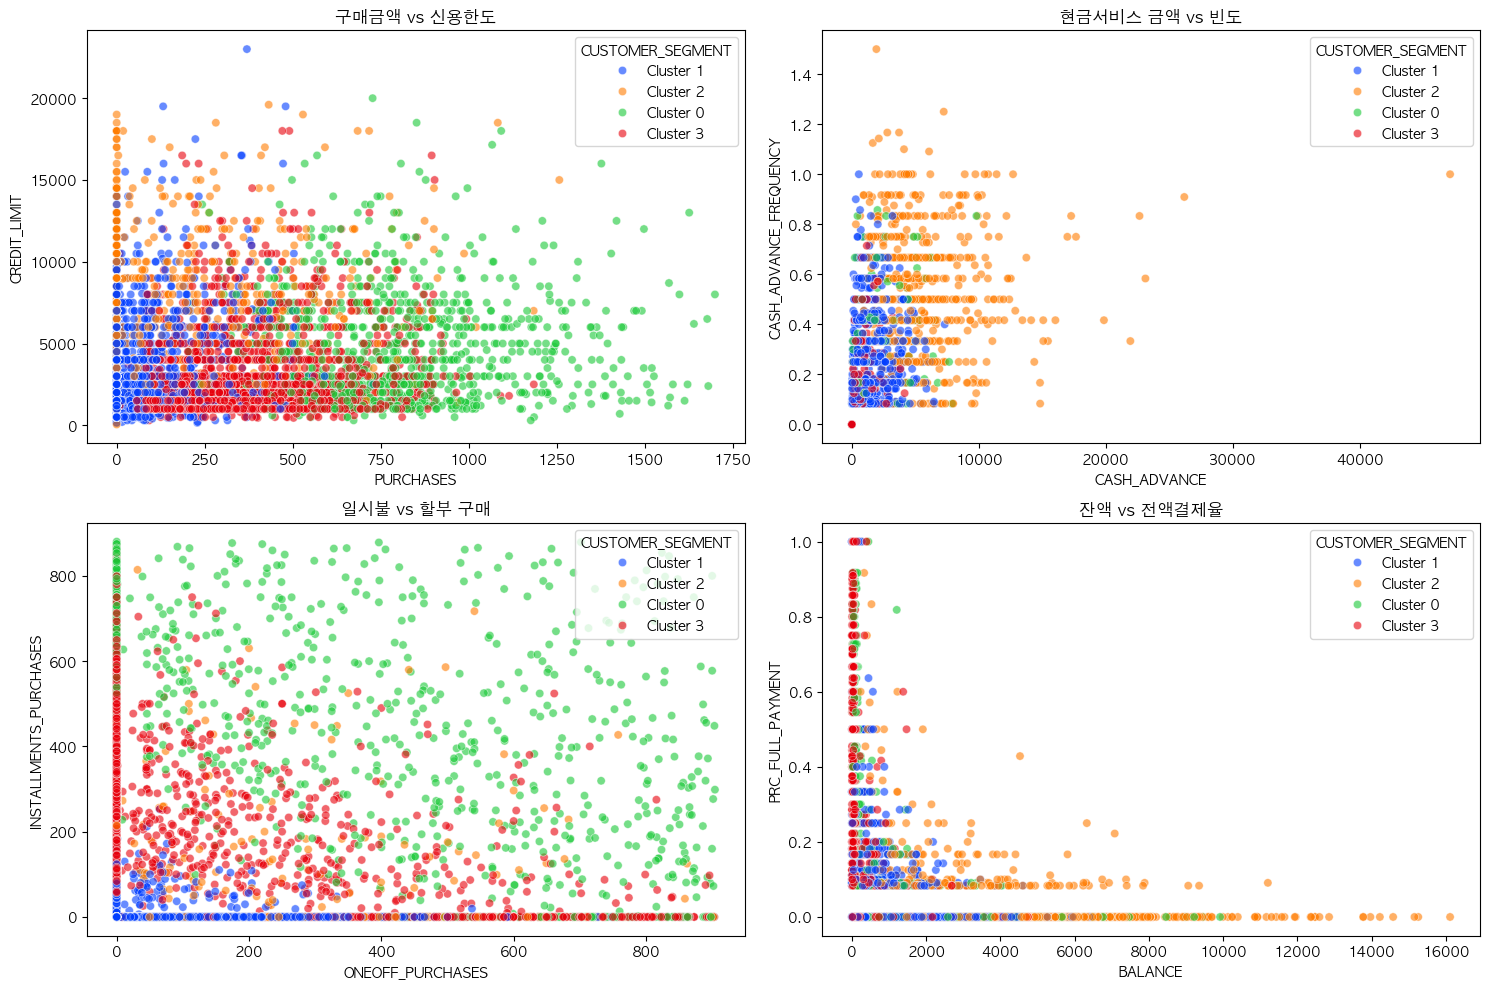

In [99]:
segment_profile = df.groupby('CUSTOMER_SEGMENT').agg({
    'BALANCE': 'mean',
    'PURCHASES': 'mean',
    'ONEOFF_PURCHASES': 'mean',
    'INSTALLMENTS_PURCHASES': 'mean',
    'CASH_ADVANCE': 'mean',
    'PURCHASES_FREQUENCY': 'mean',
    'CASH_ADVANCE_FREQUENCY': 'mean',
    'CREDIT_LIMIT': 'mean',
    'PRC_FULL_PAYMENT': 'mean'
}).round(2)

# 세그먼트별 주요 특성 시각화
plt.figure(figsize=(15, 10))

# 구매 패턴
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='PURCHASES', y='CREDIT_LIMIT', 
                hue='CUSTOMER_SEGMENT', palette='bright', alpha=0.6)
plt.title('구매금액 vs 신용한도')

# 현금서비스 패턴
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='CASH_ADVANCE', y='CASH_ADVANCE_FREQUENCY',
                hue='CUSTOMER_SEGMENT', palette='bright', alpha=0.6)
plt.title('현금서비스 금액 vs 빈도')

# 할부 vs 일시불
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='INSTALLMENTS_PURCHASES',
                hue='CUSTOMER_SEGMENT', palette='bright', alpha=0.6)
plt.title('일시불 vs 할부 구매')

# 잔액 vs 결제율
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='BALANCE', y='PRC_FULL_PAYMENT',
                hue='CUSTOMER_SEGMENT', palette='bright', alpha=0.6)
plt.title('잔액 vs 전액결제율')

plt.tight_layout()
plt.show()
